<unknown>


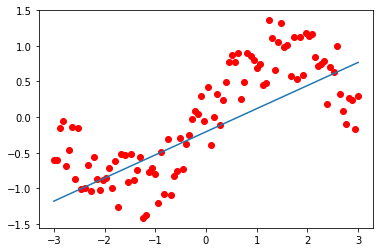

In [143]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Сгенерируем 100 значений cos от нуля до 3 с равномерным шумом(a=-0.5, b=0.5) 

n_obs = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.plot(xs,ys, "ro")


# Создание графа

# На первом шаге создаем два динамических(None) плейсхолдера c именами X и Y для input и output data
# Placeholder(через него передаем данные нашему графу) - переменная, которую определим позже

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# На втором шаге создаем Variables
# Различие Variable от placeholder состоит в том, что Variable - конструктор для того, что тренируется
# В модели линейной регрессии y = X*w + b, мы создаем Variable для w и b(как раз они и подгоняются под данные)
# в нашей модели в Y_pred, X записываются  тензоры размерности nx1. В  W и b тензоры размерности 1х1

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X, W), b)

# Запишем функцию потерь(расстояние между predictions and real observations)

cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_obs - 1)

# На вход GradientDescentOptimizer подадется константное значение learning_rate. 
# GradientDescentOptimizer работает следущим образом: мы на каждом шаге из переменной вычитаем grad*Learning_rate. 

 
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
n_epochs = 1000

#Создаем сессию для инициализации переменных
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) #инициализируем

    
prev_training_cost = 0.0 
for epoch_i in range(n_epochs):
    for (x, y) in zip(xs, ys):
        sess.run(optimizer, feed_dict={X: x, Y: y}) #Заполняем данными плейсхолдеры  
    training_cost = sess.run(cost, feed_dict={X: xs, Y: ys}) #считаем расстояние в каждой эпохе
                  
#перестаем обучаться когда расстояния почти не меняются
    if np.abs(prev_training_cost - training_cost) < 0.000001:
        break
    prev_training_cost = training_cost
           
plt.plot(xs, sess.run(Y_pred, feed_dict={X:xs}))
plt.show()